In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def calcResRow(res, allRows, i):
	# j variable is res column index
	for j in range(res.shape[1]):
		for n in range(allRows.shape[1]):
			res[i][j] += allRows[j][n] * allRows[i][n]

def createMatrix(rows, y):
	# first row - ones
	# middle rows - x[n]
	# last row - y
	allRows = np.vstack((np.ones(rows.shape[1]), rows, y))
	
	res = np.zeros((allRows.shape[0] - 1, allRows.shape[0]))

	# i variable is res row index
	for i in range(res.shape[0]):
		calcResRow(res, allRows, i)
	
	res *= 2

	return res

In [3]:
def simplifyMatrix(matr, n):
	for i in range(n + 1, matr.shape[0]):
		for j in range(matr.shape[1] - 1, n - 1, -1):
			matr[i][j] -= matr[n][j] / matr[n][n] * matr[i][n]

# if matrix have any 0 on main diagonal, then result is error
def solveGuassingMatrix(matr):
	simplifiedMatrix = matr.copy()
	# n represents current step of simplifying
	for n in range(simplifiedMatrix.shape[0] - 1):
		simplifyMatrix(simplifiedMatrix, n)
	# simplified matrix looks like this
	# 7 9 2 1
	# 0 2 1 5
	# 0 0 6 3
	# 0 0 0 8
	res = np.ones(simplifiedMatrix.shape[0])

	# solve every equation
	for i in range(simplifiedMatrix.shape[0] - 1, -1, -1):
		currentCoef = simplifiedMatrix[i][i]
		currentSum = 0
		# calculate new row based on previous x results
		for j in range(res.shape[0] - 1, i, -1):
			currentSum += res[j] * simplifiedMatrix[i][j]
		res[i] = (simplifiedMatrix[i][-1] - currentSum) / currentCoef

	return res

In [4]:
# Дані
rows = np.array([[0,		0,		0,		1,		1,		2,		2,		2],
								 [1.5,	2.5,	3.5,	1.5,	3.5,	1.5,	2.5,	2.5]])
y = np.array([		2.3,	8.5,	0.5,	2,		1,		9.1,	5,		7.2])


matr = createMatrix(rows, y)
print(matr)

coeffs = solveGuassingMatrix(matr)
print("\nКоефіцієнти:", coeffs)


[[ 16.   16.   38.   71.2]
 [ 16.   28.   36.   91.2]
 [ 38.   36.  100.  154.2]]

Коефіцієнти: [ 5.90530973  1.4619469  -1.22831858]


In [5]:

# Обчислення значення функції у точці (x1=1.5, x2=3)
x1, x2 = 1.5, 3
y_pred = coeffs[0] + coeffs[1] * x1 + coeffs[2] * x2
print(f"Значення функції у точці (1.5, 3): y = {y_pred:.4f}")

Значення функції у точці (1.5, 3): y = 4.4133


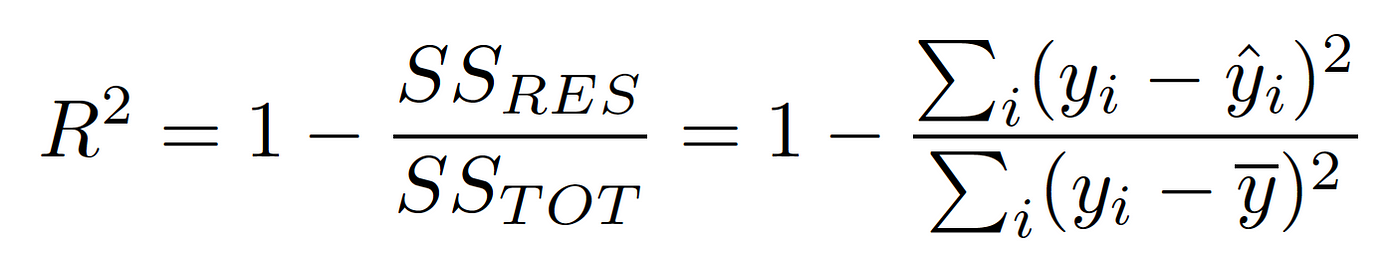

In [6]:
def r2_score(rows, y, coeffs):
	res = 1
	numerator = 0
	for i in range(y.shape[0]):
		y_pred = coeffs[0]
		for j in range(1, coeffs.shape[0]):
			y_pred += coeffs[j] * rows[j - 1][i]
		numerator += (y_pred - y[i]) ** 2
	
	denominator = 0
	y_mean = np.mean(y)
	for cur_y in y:
		denominator += (y_mean - cur_y) ** 2
	
	res -= numerator / denominator
	return res

In [7]:
# Коефіцієнт детермінації R^2
r2 = r2_score(rows, y, coeffs)
print(f"Коефіцієнт детермінації R^2 = {r2:.4f}")

Коефіцієнт детермінації R^2 = 0.2829


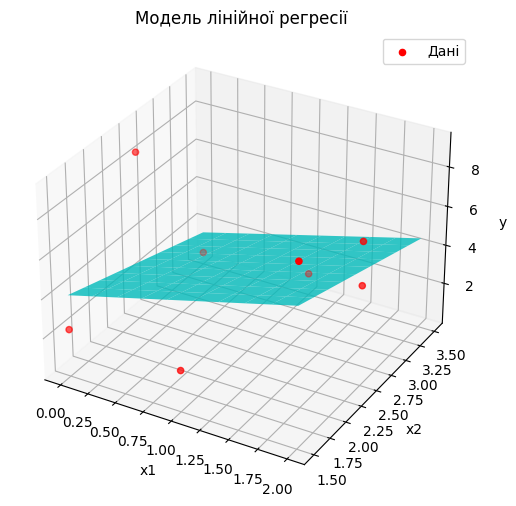

In [8]:

# Побудова графіка
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(rows[0], rows[1], y, color='red', label='Дані')

# Побудова площини регресії
x1_range = np.linspace(min(rows[0]), max(rows[0]), 10)
x2_range = np.linspace(min(rows[1]), max(rows[1]), 10)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
y_grid = coeffs[0] + coeffs[1] * x1_grid + coeffs[2] * x2_grid
ax.plot_surface(x1_grid, x2_grid, y_grid, alpha=0.8, color='cyan')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.set_title('Модель лінійної регресії')
plt.legend()
plt.show()